In [1]:
# candle sticks image processing
# simple example from the researchers code https://github.com/pecu/Series2GAF/blob/master/cnn_example/README.md
# GOAL# firstly image process the candle stick chart, high open low close needed I guess?
# How will you classify the shapes? need to measure slope etc and assign a value?
# Get CNN workgin with some level of input data
# How do we then process the pickle file to train a GAN? create the full cycle and then worry about input data and if that is correct.
# then select the model featres, and pattern match the shit out of it.
import numpy as np
from series2gaf import *
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
EURUSD = pd.DataFrame(pd.read_csv(r"C:\Users\edgil\Documents\SysTrade\candlesticks\EURUSDOHLC.csv"))
EURUSD['Datetime'] = pd.to_datetime(EURUSD['Datetime'], format="%d/%m/%Y %H:%M")

testdata = EURUSD[85000:86000]

In [32]:
# add a Rolling regression slope term to fx data
model = LinearRegression()
def RegressionCoeff(depedent):
    yx = pd.concat([pd.DataFrame(depedent),pd.DataFrame(depedent).shift(1).dropna()], axis = 1).dropna()
    yx.columns = ["y", "x"]
    # single variable only for reshape of -1,1
    ols = model.fit(np.array(yx["x"]).reshape(-1,1), np.array(yx["y"]))
    return(ols.coef_)

#print(ols.coef_)
    
#testdata.columns
y = testdata["Close"].tail(10)
x = y.shift(1).dropna()
# axis = 1 merge on col
yx = pd.concat([y,x], axis = 1).dropna()
yx.columns = ["y", "x"]
dependent = np.array(yx["y"])
# need to use reshape here as the explanatory variables need to be in form [[sample pred], [another iteration/row], [3rd row]] etc
explanatory = np.array(yx["x"]).reshape(-1,1)
ols = model.fit(explanatory, dependent)

print(ols.coef_)


[0.0461034]


In [40]:
testdata["Slope"] = testdata[["Close"]].rolling(20).apply(RegressionCoeff)


C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# workings
testy = testdata[["Open","High", "Low","Close"]].values
flat_list = [item for sublist in testy for item in sublist]

from series2gaf import *
random_series = np.random.uniform(low=50.0, high=150.0, size=(200,))

timeSeries = list(random_series)
window_size = 100 #5
rolling_length = 50 #2
fileName = 'demo_%02d_%02d' % (windowSize, rollingLength)
# gan_rand is made  up of 10 elements (lists, which are image windows), within that is a further 50 elements (np.array) and in each of those arrays we have a further 50 numbers (whihc are the params for each image window).
# when using win = 5 and rolling = 2, then gan rand was 95 elements, with 5 further elements (np.array) and then another 5 inside.
# th enormalise window scaling of 2 doubles up the window length.
# now we get a file named demo_50_10_gaf.pkl in current directory. inside the pickle file, you got a grammian angular field with shape (15, 50, 50).

# shape[0] refers to data amount : floor((len(timeSeries)-(normalize_window_scaling-1)*windowSize)/windowSize)
# shape[1] refers to image width : sliding windowSize of the picture to make into a GAF
# shape[2] refers to image height : wthe number of steps to move forward before runnign another GAF, i.e. overlapping?
gan_rand = GenerateGAF(all_ts=testy,
            window_size=window_size,
            rolling_length=rolling_length,
            fname=fileName,
            normalize_window_scaling=1.0)

ts_img = np.load('%s_gaf.pkl' % fileName)
PlotHeatmap(ts_img)

Generating...:   0%|          | 0/18 [00:00<?, ?it/s]

Generating...: 100%|##########| 18/18 [00:00<00:00, 295.73it/s]

Output Heatmaps...:   0%|          | 0/18 [00:00<?, ?it/s]

Output Heatmaps...:   6%|5         | 1/18 [00:00<00:03,  5.48it/s]

Output Heatmaps...:  11%|#1        | 2/18 [00:00<00:02,  5.53it/s]

Output Heatmaps...:  17%|#6        | 3/18 [00:00<00:02,  5.33it/s]

Output Heatmaps...:  22%|##2       | 4/18 [00:00<00:02,  5.30it/s]

Output Heatmaps...:  28%|##7       | 5/18 [00:00<00:02,  5.32it/s]

Output Heatmaps...:  33%|###3      | 6/18 [00:01<00:02,  5.37it/s]

Output Heatmaps...:  39%|###8      | 7/18 [00:01<00:01,  5.50it/s]

Output Heatmaps...:  44%|####4     | 8/18 [00:01<00:01,  5.89it/s]

Output Heatmaps...:  50%|#####     | 9/18 [00:01<00:01,  6.02it/s]

Output Heatmaps...:  56%|#####5    | 10/18 [00:01<00:01,  6.31it/s]

Output Heatmaps...:  61%|######1   | 11/18 [00:01<00:01,  6.40it/s]

Output Heatmaps...:  67%|######6   | 12/18 [00:02<00:00,  6.47it/s]

Output Heatmaps...:  72%|#######2  | 13/18 [00:02<00:00,  6.68it/s]

Output Heatmaps...:  78%|#######7  | 14/18 [00:02<00:00,  6.79it/s]

Output Heatmaps...:  83%|########3 | 15/18 [00:02<00:00,  6.75it/s]

Output Heatmaps...:  89%|########8 | 16/18 [00:02<00:00,  6.83it/s]

Output Heatmaps...:  94%|#########4| 17/18 [00:02<00:00,  6.84it/s]

Output Heatmaps...: 100%|##########| 18/18 [00:02<00:00,  6.95it/s]

Output Heatmaps...: 100%|##########| 18/18 [00:02<00:00,  6.21it/s]

In [ ]:
# stage 2, input the GAF data to the CNN data.
# https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342
# Le Net tensor flow implementation --> https://colab.research.google.com/drive/1kV3Jpxzup63GfJB1FGKxTSKd6Ek8J3sA
# Le Net Keras implementation --> https://colab.research.google.com/drive/1CVm50PGE4vhtB5I_a_yc4h5F-itKOVL9
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

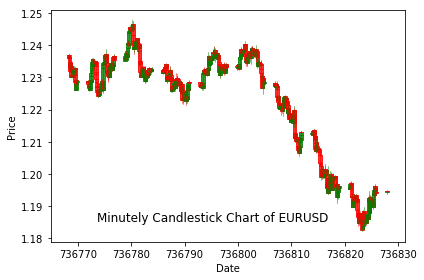

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from matplotlib.finance import candlestick_ohlc
testdata = EURUSD[85000:86000]
ohlc = testdata[["Datetime","Open","High", "Low","Close"]]
# apply datetime to all py_ timestamp objects (pd.to_datetime makes a timestamp object
#ohlc["TrueDt"] = ohlc["Datetime"].map(lambda ts: ts.to_pydatetime())
#ohlc["Datetime"] = ohlc["Datetime"].dt.to_pydatetime()
ohlc['Datetime'] = ohlc['Datetime'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

#candlestick_ohlc(ax, opens = ohlc["Open"].values,highs = ohlc["High"].values, lows = ohlc["Low"].values,closes = ohlc["Close"].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
candlestick_ohlc(ax,ohlc.values , width=0.7, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Minutely Candlestick Chart of EURUSD', y = 0.25)

# Formatting Date
#date_format = mpl_dates.DateFormatter('%d-%m-%Y %')
#ax.xaxis.set_major_formatter(date_format)
#fig.autofmt_xdate()

fig.tight_layout()

plt.show()

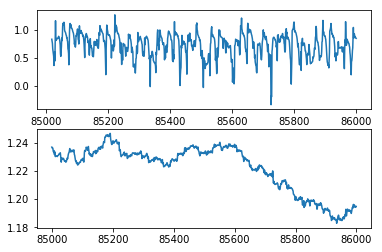

In [41]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(testdata["Slope"])
plt.subplot(2, 1, 2)
plt.plot(testdata["Close"])